# Table of Contents
 <p><div class="lev1"><a href="#Task-1.-Compiling-Ebola-Data"><span class="toc-item-num">Task 1.&nbsp;&nbsp;</span>Compiling Ebola Data</a></div>
 <div class="lev1"><a href="#Task-2.-RNA-Sequences"><span class="toc-item-num">Task 2.&nbsp;&nbsp;</span>RNA Sequences</a></div>
 <div class="lev1"><a href="#Task-3.-Class-War-in-Titanic"><span class="toc-item-num">Task 3.&nbsp;&nbsp;</span>Class War in Titanic</a></div></p>

In [ ]:
DATA_FOLDER = '' # Use the data folder provided in Tutorial 02 - Intro to Pandas.

## Task 1. Compiling Ebola Data

The `DATA_FOLDER/ebola` folder contains summarized reports of Ebola cases from three countries (Guinea, Liberia and Sierra Leone) during the recent outbreak of the disease in West Africa. For each country, there are daily reports that contain various information about the outbreak in several cities in each country.

Use pandas to import these data files into a single `Dataframe`.
Using this `DataFrame`, calculate for *each country*, the *daily average* per year of *new cases* and *deaths*.
Make sure you handle all the different expressions for *new cases* and *deaths* that are used in the reports.

In [ ]:
# Write your answer here

## Task 2. RNA Sequences

In the `DATA_FOLDER/microbiome` subdirectory, there are 9 spreadsheets of microbiome data that was acquired from high-throughput RNA sequencing procedures, along with a 10<sup>th</sup> file that describes the content of each. 

Use pandas to import the first 9 spreadsheets into a single `DataFrame`.
Then, add the metadata information from the 10<sup>th</sup> spreadsheet as columns in the combined `DataFrame`.
Make sure that the final `DataFrame` has a unique index and all the `NaN` values have been replaced by the tag `unknown`.

In [ ]:
# Write your answer here

## Task 3. Class War in Titanic

Use pandas to import the data file `Data/titanic.xls`. It contains data on all the passengers that travelled on the Titanic.

In [115]:
from IPython.core.display import HTML
#HTML(filename='/Users/sonia/Documents/GitHub/ADA2017-Tutorials/02 - Intro to Pandas/Data'+'/titanic.html')



For each of the following questions state clearly your assumptions and discuss your findings:
1. Describe the *type* and the *value range* of each attribute. Indicate and transform the attributes that can be `Categorical`. 
2. Plot histograms for the *travel class*, *embarkation port*, *sex* and *age* attributes. For the latter one, use *discrete decade intervals*. 
3. Calculate the proportion of passengers by *cabin floor*. Present your results in a *pie chart*.
4. For each *travel class*, calculate the proportion of the passengers that survived. Present your results in *pie charts*.
5. Calculate the proportion of the passengers that survived by *travel class* and *sex*. Present your results in *a single histogram*.
6. Create 2 equally populated *age categories* and calculate survival proportions by *age category*, *travel class* and *sex*. Present your results in a `DataFrame` with unique index.

We start by loading the data into a pandas dataframe and call it `titanic`:

In [1]:
import pandas as pd
import numpy as np
titanic = pd.read_excel('/Users/sonia/Documents/GitHub/ADA2017-Tutorials/02 - Intro to Pandas/Data/titanic.xls')
titanic.head(1)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"


The dataframe contains some missing values, represented by `NaN`

**question 1**
Titanic contains 1309 observations of 14 variables. We can view the default types of each variable in the cell bellow

In [310]:
Type=titanic.dtypes
Type.name='Type'
Type

pclass         int64
survived       int64
name          object
sex           object
age          float64
sibsp          int64
parch          int64
ticket        object
fare         float64
cabin         object
embarked      object
boat          object
body         float64
home.dest     object
Name: Type, dtype: object

However, several variables represented here by integers or doubles could be more efficiently described with categorical values. These variables are the class, the sex, the embarkation site and the survival of the passengers.
We will then change their type to `Categorical`.


In [311]:
titanic.pclass=pd.Categorical(titanic.pclass,ordered=True)
#titanic.survived=pd.Categorical(titanic.survived)
titanic.sex=pd.Categorical(titanic.sex)
titanic.embarked=pd.Categorical(titanic.embarked)

We now construct a table to summarize the type of all variables and eventually their range.

In [312]:
description = titanic.describe()
description.columns
description=description.drop('body',axis=1)
description=description.transpose()
#description['Type']=titanic.dtypes
description=description.drop(['count','std','25%','50%','75%'],axis=1)
result = pd.concat([Type, description], axis=1)
result.fillna('-')

,Type,mean,min,max
age,float64,29.8811,0.1667,80
boat,object,-,-,-
body,float64,-,-,-
cabin,object,-,-,-
embarked,object,-,-,-
fare,float64,33.2955,0,512.329
home.dest,object,-,-,-
name,object,-,-,-
parch,int64,0.385027,0,9
pclass,int64,-,-,-


**question 2**

In this section, we will draw histograms of some key variables. For this purpose we first import the necessary libraries (`matplotlib`,`seaborn`) 

In [313]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
#import matplotlib.gridspec as gridspec

We create a figure and divide it into 4 subplots where the histograms for each variables are drawn.


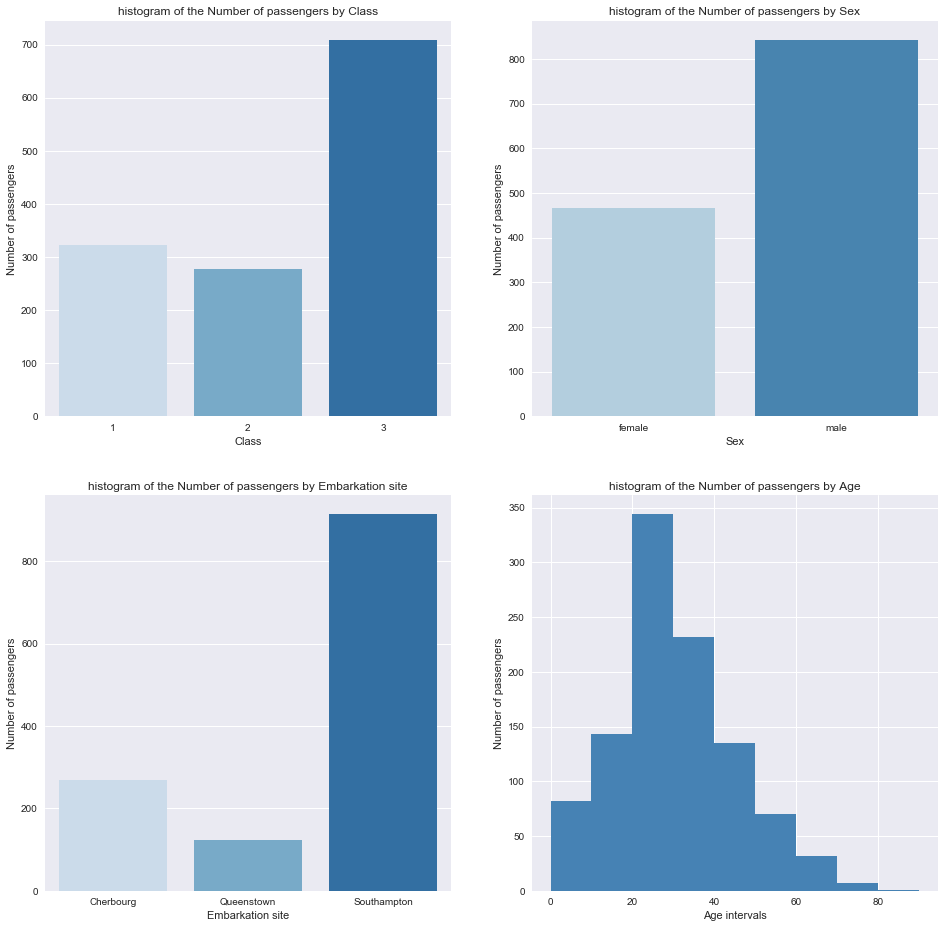

In [314]:

f, ((ax1, ax2),(ax3, ax4)) = plt.subplots(2,2, figsize=(16, 16))
def create_plot (var,xlab,ylab,axis): 
    sns.countplot(x=var,data=titanic, palette="Blues", ax=axis)
    axis.set_ylabel(ylab)
    axis.set_xlabel(xlab)    
    axis.set_title('histogram of the '+ylab+' by '+xlab)

create_plot('pclass','Class','Number of passengers',ax1)
create_plot('sex','Sex','Number of passengers',ax2)
create_plot('embarked','Embarkation site','Number of passengers',ax3)
# Set the name of the embarkation sites as labels for x-axis (instead of just the first letters)
embark_sites = ['Cherbourg','Queenstown','Southampton']
ax3.set_xticklabels(embark_sites)
#the Age histogram has to be treated separately as the variable is not categorical but continuous.     
titanic.age.hist(bins =[0,10,20,30,40,50,60,70,80,90],ax=ax4,color='steelblue')
plt.xlabel('Age intervals')
plt.ylabel('Number of passengers')
plt.title('histogram of the Number of passengers by Age')
plt.show()


**question 3**

*Calculate the proportion of passengers by cabin floor. Present your results in a pie chart.*

The cabin floor of each passenger is given by the varialbe `cabin`. This variable is a `string` created by the concatenation of the floor identifcation (an upper-case letter) and the number of the cabin. Hence, in order to obtain the number of passengers on each floor, we have to extract the letter from the string and count the number of its  occurences in the column.
In this section, we will first determine how many floors are represented in the database.


In [315]:
import string as st
titanic.cabin=titanic.cabin.fillna('-')
letters = st.ascii_uppercase
letters

def extract_floor (cabin):
    ind=pd.Series([-1])
    for i in letters:
        ind[i]=cabin.find(i)
        
    ind=ind.transpose()
    result=ind[ind.values>-1].index[0]
        
    return result
titanic['floor']='-'
for i in titanic.index:
    if titanic.cabin[i]!='-':
        titanic.floor[i]=  extract_floor(str(titanic.cabin[i]))

  

/Users/sonia/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [246]:
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,floor
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",B
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",C
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",C
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",C
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",C


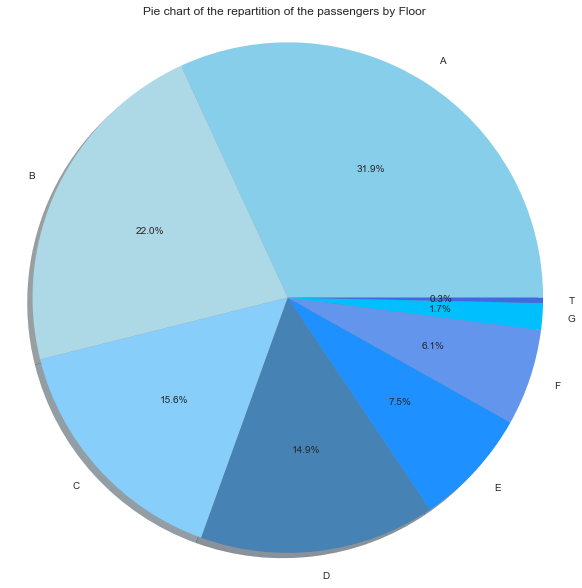

In [303]:
titanic.floor=pd.Categorical(titanic.floor)
data=titanic.floor.value_counts()


labels = data.index.categories[1:]
values = data.values[1:]
colors =['skyblue','lightblue','lightskyblue','steelblue','dodgerblue','cornflowerblue','deepskyblue','royalblue']
f, ax = plt.subplots(1,1, figsize=(8,8),)
plt.pie(values, labels=labels,autopct='%1.1f%%', shadow=True,colors=colors)
plt.axis('equal')
plt.tight_layout()
plt.title('Pie chart of the repartition of the passengers by Floor')
plt.show()



**Question 4**

For each travel class, calculate the proportion of the passengers that survived. Present your results in pie charts.



In [316]:
titanic.survived.groupby(titanic.pclass).sum()

pclass
1    200
2    119
3    181
Name: survived, dtype: int64